In [1]:
# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing.image import save_img
import imutils
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [2]:
image = cv2.imread('Dataset/example/correct/(8,12)_m_ 5.jpg',1)
image = cv2.resize(image,(75, 75))
output = imutils.resize(image, width=400)



image = np.expand_dims(image, axis=0)

In [3]:
# load the trained convolutional neural network and the multi-label
# binarizer
print("[INFO] loading network...")
model = load_model("NewNet8/Models/NewNet8_V2_img75_50Epo_94_92va.model")
mlb = pickle.loads(open("pickle/image_pickle/mlb_75.pickle", "rb").read())

[INFO] loading network...


C:\Users\Roshni\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator MultiLabelBinarizer from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
# classify the input image then find the indexes of the two class
# labels with the *largest* probability
print("[INFO] classifying image...")
proba = model.predict(image)[0]
idxs = np.argsort(proba)[::-1][:2]


# loop over the indexes of the high confidence class labels
for (i, j) in enumerate(idxs):
	# build the label and draw the label on the image
	label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
	cv2.putText(output, label, (10, (i * 30) + 25), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# show the probabilities for each of the individual labels
for (label, p) in zip(mlb.classes_, proba):
	print("{}: {:.2f}%".format(label, p * 100))

[INFO] classifying image...
(0, 2): 2.17%
(15, 20): 19.48%
(25, 32): 14.89%
(38, 43): 4.14%
(4, 6): 3.42%
(48, 53): 14.22%
(60, 100): 1.05%
(8, 12): 53.80%
f: 68.06%
m: 31.97%


In [5]:
# show the output image
cv2.imshow("Output", output)
cv2.waitKey(0)

-1

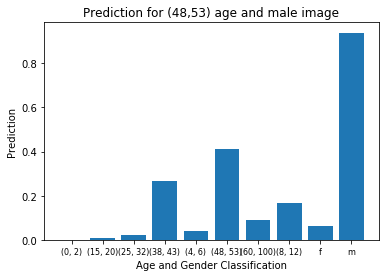

In [126]:
import matplotlib.pyplot as plt

#plt.figure()
index = np.arange(len(mlb.classes_))
plt.bar(index, proba)
plt.xlabel('Age and Gender Classification', fontsize=10)
plt.ylabel('Prediction', fontsize=10)
plt.xticks(index, mlb.classes_, fontsize=8, rotation=0)
plt.title('Prediction for (48,53) age and male image')
plt.show()
#plt.savefig("25_32_f_3_histogram")